# Draft 1 - Capstone

## Stock Price Predictor

### Inputs
* stock symbol of NYSE or NASDAQ stock exchange
* daily trading data
* past date range, at least 1 month ago, for training model

#### Trading Data Features
* Opening Price (Open)
* Highest stock trading price (High)
* Number of stock shares traded (Volume)
* Closing price adjusted for splits and dividends (Adjusted Close)

### Processing

#### Parameters
* test date range, after training date range
* prediction date, after test date range

#### Model
* regression model

*TODO: select a model or set of models*

### Output
Predicted Adjusted Close for the prediction date, a specific trading day.

*TODO: avoid holidays or days the stock was not traded; how to adjust?

### Metric for Evaluation
Predicted stock price within -/+5% of actual Adjusted Close

## Exploration

### Inputs
First, the stock symbol and date range are collected and minimally checked.

The data range will identify the stock data to be used to train the model.

In [1]:
from datetime import datetime

# Stock Symbol - Apple Inc. (AAPL) NASDAQ
stock_symbol = 'aapl'.upper()

# Date range for training data; backwards so courtesy swap flagged
start_date = datetime.strptime('2017-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2012-12-31', '%Y-%m-%d')

# Validate date range; exchange values if invalid range
if (start_date > end_date):
    (start_date, end_date) = (end_date, start_date)

# Adjusted end date one month out
end_date_plus_month = datetime.fromordinal(end_date.toordinal() + 31)

# Check end date plus one month is past today
today = datetime.now()
if (end_date_plus_month > today):
    print('{} is not at least 31 days (end_date_plus_month) before {}'.format(end_date.date(), end_date_plus_month.date(),
                                                                              today.date()))
else:
    print('Stock for price prediction:\n* {}'.format(stock_symbol))
    print('\nTraining data: \n* start date {} \n* end date {}'.format(start_date.date(), end_date.date()))

Stock for price prediction:
* AAPL

Training data: 
* start date 2012-12-31 
* end date 2017-01-01


### Process
Select prediction date between today's date and test end date.


#### Model
* Regression... TODO


In [2]:
# Prediction date
prediction_date = datetime.fromordinal(end_date.toordinal() + ((today.toordinal() - end_date.toordinal()) / 2))

# adjust if non-weekday (ordinals 0-4 are M-F): Saturday back one day, Sunday forward one day
if (prediction_date.weekday() == 5):
    prediction_date = datetime.fromordinal(prediction_date.toordinal() - 1)
elif (prediction_date.weekday() == 6):
    prediction_date = datetime.fromordinal(prediction_date.toordinal() + 1)

print('Prediction is {}'.format(prediction_date.date()))
print('The prediction date is a weekday. No adjustment has been made for holidays or stock-specific non-trading day.')

Prediction is 2017-03-24
The prediction date is a weekday. No adjustment has been made for holidays or stock-specific non-trading day.


#### Stock Data
Stock data will be downloaded from [Quandl](https:///www.quandl.com).

> "Quandl (/ˈkwɑːndəl/) is a platform for financial, economic, and alternative data that serves investment professionals. Quandl sources data from over 500 publishers. All Quandl's data are accessible via an API. API access is possible through packages for multiple programming languages including R, Python, Matlab, Maple (software) and Stata." [Wikipedia](https://en.wikipedia.org/wiki/Quandl)

In [3]:
import quandl

#token = '' # TODO: omit from committed code

# time series call for pd.DataFrame object
data = quandl.get("WIKI/"+stock_symbol, start_date=start_date, end_date=end_date)

# as numpy array; TODO: use case
# data = quandl.get("WIKI/AAPL", returns="numpy")

In [4]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-12-31,510.530,535.4000,509.0000,532.1729,23553300.0,0.0,1.0,66.471857,69.709972,66.272648,69.289798,164873100.0
2013-01-02,553.820,555.0000,541.6300,549.0300,20018500.0,0.0,1.0,72.108287,72.261925,70.521129,71.484621,140129500.0
2013-01-03,547.880,549.6700,541.0000,542.0959,12605900.0,0.0,1.0,71.334889,71.567950,70.439101,70.581790,88241300.0
2013-01-04,536.965,538.6299,525.8286,527.0000,21226200.0,0.0,1.0,69.913738,70.130511,68.463760,68.616278,148583400.0
2013-01-07,522.000,529.3000,515.2000,523.9000,17291300.0,0.0,1.0,67.965270,68.915742,67.079899,68.212653,121039100.0


In [5]:
# Explore if both NASDAQ and NYSE stock symbol data are available (Quandl), via 'Applied Industrial Technologies' check
test_stock_symbol = 'AIT'
test_data = quandl.get("WIKI/"+test_stock_symbol, start_date=start_date, end_date=end_date)

In [6]:
test_data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-12-23,60.45,61.350,60.2,61.20,150911.0,0.0,1.0,59.890459,60.782128,59.642773,60.633516,150911.0
2016-12-27,61.40,61.650,60.8,60.85,168563.0,0.0,1.0,60.831665,61.079351,60.237219,60.286756,168563.0
2016-12-28,61.05,61.300,59.6,60.05,181645.0,0.0,1.0,60.484905,60.732591,59.048326,59.494161,181645.0
2016-12-29,60.20,60.525,59.6,60.00,116698.0,0.0,1.0,59.642773,59.964764,59.048326,59.444624,116698.0
2016-12-30,59.95,59.950,59.1,59.40,154468.0,0.0,1.0,59.395087,59.395087,58.552955,58.850178,154468.0


In [7]:
# Actual stock data for prediction date
actual_data = quandl.get("WIKI/"+stock_symbol, start_date=prediction_date, end_date=prediction_date)
actual_data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-03-24,141.5,141.74,140.35,140.64,22395563.0,0.0,1.0,140.923308,141.16233,139.777995,140.066813,22395563.0


In [8]:
# Input features dataframe
# test_data[['Open','High', 'Volume','Adj. Close']]

# Review of P4F ch 6 items
# test_data.index
# test_data.columns
# test_data.ix[['2016-12-23']] -- why NaNs
# test_data.ix[test_data.index[1:3]] -- works ['2013-01-02','2013-01-03']
# test_data[['Open','High', 'Volume','Adj. Close']].std()
# test_data[['Open','High', 'Volume','Adj. Close']].mean()

data[['Open','High', 'Volume','Adj. Close']].describe()

,Open,High,Volume,Adj. Close
count,1009.000000,1009.000000,1.009000e+03,1009.000000
mean,248.496196,250.749467,3.485200e+07,91.947488
std,188.733638,190.398653,2.333064e+07,21.766888
min,90.000000,90.700000,5.704900e+06,51.135441
25%,107.085000,107.950000,1.433510e+07,70.826791
50%,118.290000,119.300000,3.208425e+07,95.668540
75%,455.752700,459.280000,4.705392e+07,109.988889
max,649.900000,651.260000,1.895606e+08,127.446743


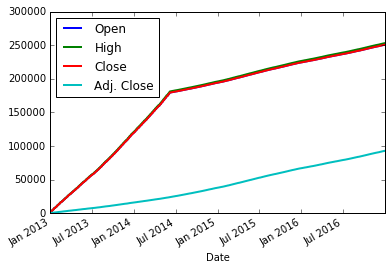

In [9]:
%matplotlib inline
data[['Open','High', 'Close', 'Adj. Close']].cumsum().plot(lw=2.0)

#### Why is the 'Adj. Close' lower than 'Close'
>An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time prior to the next day's open. The adjusted closing price is often used when examining historical returns or performing a detailed analysis on historical returns. [Investopedia 'What is Adjusted Closing Price](http://www.investopedia.com/terms/a/adjusted_closing_price.asp) 

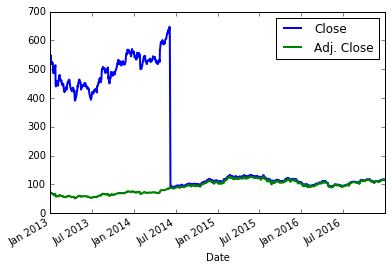

In [10]:
data[['Close', 'Adj. Close']].plot(lw=2.0)

#### What happened to Apple's stock during June 2014?
Apple stock underwent a 7-to-1 stock split on June 9, 2014 [CNN Money](http://money.cnn.com/2014/06/09/investing/apple-stock-split-reactions/index.html) which is reflected in the adjusted close.

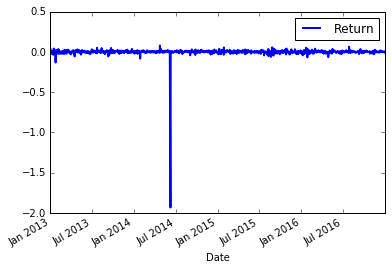

In [11]:
import numpy as np

data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

data[['Return']].plot(lw=2.0)

When examining returns using the close, that data naively shows a large drop on the day of the stock split. 

The adjusted close data shows the clearer indications of returns by accounting for the 7-to-1 stock split and the log return values.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efefe65a210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7efefe58c1d0>], dtype=object)

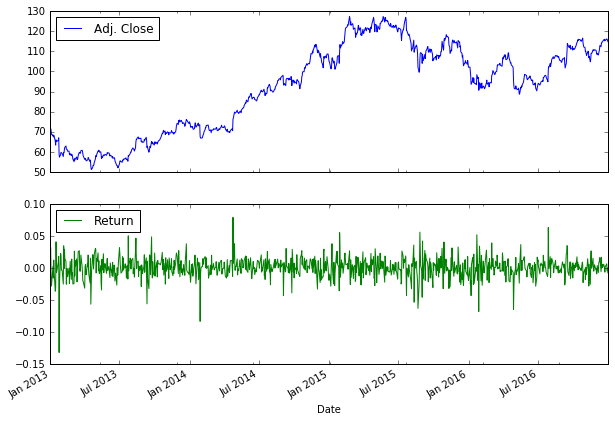

In [12]:
# remove return column based on close
del data['Return']

data['Return'] = np.log(data['Adj. Close'] / data['Adj. Close'].shift(1))

data[['Adj. Close', 'Return']].plot(subplots=True, figsize=(10,7))

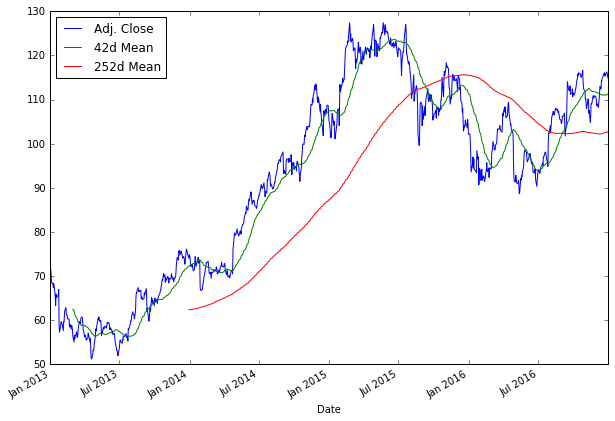

In [13]:
import pandas as pd

data['42d Mean'] = data['Adj. Close'].rolling(window=42, center=False).mean()
data['252d Mean'] = data['Adj. Close'].rolling(window=252, center=False).mean()

data[['Adj. Close', '42d Mean', '252d Mean']].plot(figsize=(10, 7))

#### The Golden Cross
>The golden cross is a bullish breakout pattern formed from a crossover involving a security's short-term moving average (such as the 15-day moving average) breaking above its long-term moving average (such as 50-day moving average) or resistance level. [Investopedia](http://www.investopedia.com/terms/g/goldencross.asp)

For the previous graph, the 'moving average' (or rolling mean) uses 42 and 252 as short and long term values.
* 42 is the typical number of trading days for 2 month period
* 252 is the typical number of trading days in a 1 year

It may be noted there are varied opinions on the value of the Golden Cross as a technical trading tool:
* http://www.stockopedia.com/content/trading-the-golden-cross-does-it-really-work-69694/
* http://www.cnbc.com/2017/05/22/golds-golden-cross-the-metal-just-formed-a-chart-pattern-that-can-signal-a-breakout.html
* http://www.cnbc.com/2016/04/26/looks-like-the-golden-cross-isnt-so-golden-after-all.html

In [14]:
dates = data[['Adj. Close']].index
dates = [date.toordinal() for date in dates]
dates = np.reshape(dates,(len(dates), 1))

prices = data[['Adj. Close']].values
prices = prices.ravel()

In [15]:
# explore models suggested in Predicting Stock Prices resource
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=1e3)
svr_lin.fit(dates, prices)
# SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto', 
#     kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

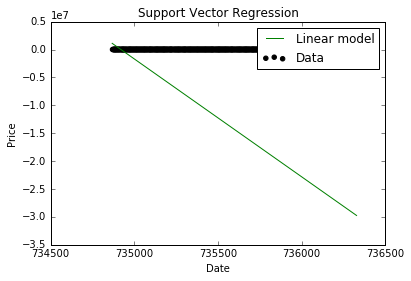

In [16]:
import matplotlib.pyplot as plt
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [18]:
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)

#svr_poly.fit(dates, prices)
# busy then apparently NO result?

svr_poly = SVR(kernel='poly', C=1e3, degree=5)

svr_poly.fit(dates, prices)
# ah ha, degree 5, at least works; ah, tuning parameters)
# SVR(C=1000.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='auto',
#     kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

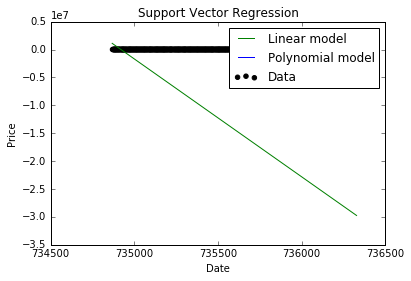

In [19]:
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

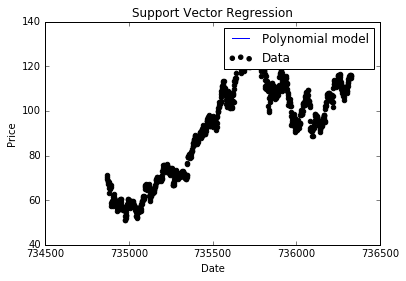

In [22]:
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
# hmm, apparently no polynomial model graph

In [23]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

svr_rbf.fit(dates,prices)
# SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
#     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

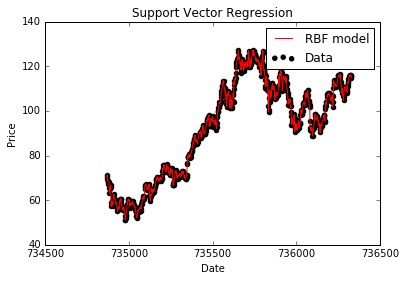

In [24]:
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
# explore models suggested in Predicting Stock Prices resource
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

svr_lin.fit(dates, prices)
svr_poly.fit(dates, prices)
svr_rbf.fit(dates,prices)

import matplotlib.pyplot as plt
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

[^1]: https://www.quandl.com